<a href="https://colab.research.google.com/github/cengaiyeung/20MA573/blob/master/src/hw05_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Example 1:**

 Using the Algo1, design estimator $\hat{\pi} (N)$ and compute $\hat{\pi} (10000)$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

In [0]:
#First, Design the estimator
def mcpi(n):
  n1 = 0
  for i in range(n):
    x = np.random.uniform(-1,1)
    y = np.random.uniform(-1,1)
    if x**2 + y**2 <1:
      n1 = n1 + 1
  vpi = 4 * n1 / n
  return vpi


Next, we want to compute $\hat{\pi}$ (10000) by using the estimator.

In [85]:
print('The answer of example 1 is: ')
print(mcpi(10000))

The answer of example 1 is: 
3.1484


### **Example 3:**

Given i.i.d $\{\alpha_{i}: i \in 1, 2, \dots, N\}$, we use

$$\bar{\alpha}_{N} = \frac{1}{N} \sum_{i = 1}^{N} \alpha_{i}$$

as its estimator of the mean $\mathbb{E} [\alpha_{1}]$ and use

$$\beta_{N} = \frac{1}{N} \sum_{i = 1}^{N}(\alpha_{i} - \bar{\alpha}_{N})^{2}$$

as the estimator of $Var(\alpha_{1})$. Suppose $\alpha_{1} \in L^{4}$, then

- Prove $\beta_{N}$ is biased.

- (optional)Prove that $\beta_{N}$ is consistent in $L^{2}$.

- Can you propose an unbiased estimator?


## **Pf 1:**

What we need to show is 

$$\mathbb{E} [\beta_{N}] - Var(\alpha_{i}) \neq 0$$

Then, we calculate $\mathbb{E}[\beta_{N}]$ and $Var(\alpha_{i})$ seperately. Since  $\{\alpha_{i}: i \in 1, 2, \dots, N\}$ is i.i.d, then we have 

$$\mathbb{E} [\beta_{N}] = \mathbb{E}[\frac{1}{N}\sum_{i = 1}^{N}(\alpha_{i} - \bar\alpha_{N})] = \frac{1}{N}\mathbb{E}[\sum_{i = 1}^{N}(\alpha_{i}^{2} - 2\alpha_{i}\bar\alpha_{N} + \bar\alpha_{N}^{2} )]=\frac{1}{N}\mathbb{E}[\sum_{i=1}^{N}\alpha_{i}^{2} - 2N\bar\alpha_{N}^{2} + N\bar\alpha_{N}^{2}] = \frac{1}{N}\sum_{i=1}^{N} \mathbb{E}[\alpha_{i}^{2}] - \mathbb{E}[\bar\alpha_{N}^{2}]=\mathbb{E}[\alpha_{1}^{2}] - \mathbb{E}[\bar\alpha_{N}^{2}]$$

and, 

$$\mathbb{E}[\bar\alpha_{N}^{2}] =\mathbb{E} [(\frac{1}{N} \sum_{i = 1}^{N} \alpha_{i})^{2}] = \frac{1}{N^{2}}\mathbb{E}[\sum_{i=1}^{N}\alpha_{i}^{2}] + \mathbb{E}[\sum_{i\neq j}^{N}\alpha_{i}\alpha_{j}] = \frac{1}{N^{2}} \sum_{i = 1}^{N} \mathbb{E} [\alpha_{i}^{2}] + \frac{2}{N^{2}} \sum_{i \neq j}^{N} \mathbb{E}[\alpha_{i}] \mathbb{E}[\alpha_{j}] = \frac{1}{N} \mathbb{E} [\alpha_{1}^{2}] + \frac{1}{N^{2}}N(N-1)\mathbb{E}[\alpha_{1}]^2 = \frac{1}{N} \mathbb{E} [\alpha_{1}^{2}] + \frac{1}{N}(N-1)\mathbb{E}[\alpha_{1}]^2$$

thus, 

$$\mathbb{E} [\beta_{N}] = \mathbb{E}[\alpha_{1}^2] - \frac{1}{N} \mathbb{E} [\alpha_{1}^{2}] - \frac{1}{N}(N-1)\mathbb{E}[\alpha_{1}]^2 = \frac{N-1}{N}Var(\alpha_{1}) \neq 0$$

then

$$\mathbb{E} [\beta_{N}] - Var(\alpha_{i}) = -\frac{1}{N}Var(\alpha_{1}) \neq 0$$
Thus, ww can conclude that $\beta_{N}$ is biased.

## **Pf 3:**

By question 1, we get 
$$\mathbb{E} [\beta_{N}] = \frac{N-1}{N}Var(\alpha_{1})$$

Need to show
$$\mathbb{E} [\hat\beta_{N}] - Var(\alpha_{i}) = 0$$

Let $\hat\beta_{N} = \frac{N}{N-1} \beta_{N}$, then we can get
$$\mathbb{E} [\hat\beta_{N}] - Var(\alpha_{i}) = \mathbb{E} [\frac{N}{N-1}\beta_{N}] - Var(\alpha_{i}) = 0$$
Thus we get $\hat\beta_{N}$ is our unbiased estimator.

### **Example 4:**

- Use $\beta_{100}$ of exercise 3 to estimate $MSE(\hat{\pi}_{N})$ by repeating $\pi_{N}$ of exercise 1. One must write both pseudocode and python code.

- Repeat above estimation of $MSE(\hat{\pi}_{N})$ for $N = 2^{i}: i = 5, 6, \dots, 10$ and plot log-log chart.


In [0]:
mcpi_list = []

In [0]:
#define the function for MSE
def MSE(n,N):
  for i in range(0 ,N):
    pi1 = mcpi(n)
    mcpi_list.append(pi1)
  return np.var(mcpi_list)

In [91]:
n = 10000
N = 100
print('The estimate value of mse is:')
print(MSE(n,N))

The estimate value of mse is:
0.00027418634488888876


In [101]:
mse_list = []
x = []
for j in range(5,11):
  x1 = 2**j
  x.append(x1)
  mse1 = MSE(x1,100)
  mse_list.append(mse1)
print('When i=5,6,7,8,9,10, the estimation of mse is:')
print(mse_list)

When i=5,6,7,8,9,10, the estimation of mse is:
[0.04676336217774509, 0.046648436618741546, 0.0460496396516672, 0.04528298673424959, 0.044460171422625955, 0.043576447393324426]


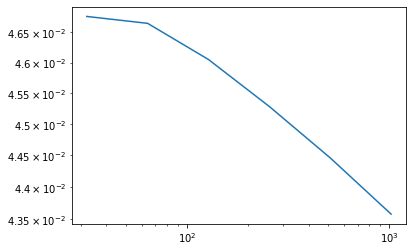

In [102]:
plt.loglog(x,mse_list)